<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

## Task 1: Become familiar with the dataset

The following describes the dataset variables:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


We have the unnecessary column Unnamed: 0 so let us start by dropping this column.

In [ ]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Let us now check for missing values.

In [5]:
boston_df.isnull().values.any()

np.False_

We don't have any NaN values. Let us proceed with checking the data types for each column.

In [6]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

Each column is of the correct data type. Thefore, there is no need to preprocess the data as it's ready for our purposes.

## Task 2: Generate Descriptive Statistics and Visualizations

Let us start by inspecting the data.

In [7]:
boston_df.agg(['count', 'mean', 'median', 'std'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
median,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104


Text(0.5, 1.0, 'Median value of owner-occupied homes')

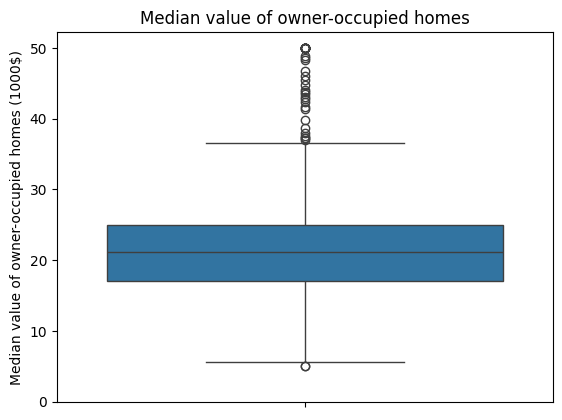

In [8]:
sns.boxplot(data=boston_df, y='MEDV')
plt.ylim(0,)
plt.ylabel('Median value of owner-occupied homes (1000$)')
plt.title('Median value of owner-occupied homes')

In [9]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

By looking at the above box plot, we can make the following points:

- The median value of owner-occupied homes (`MEDV` column) has a median around 21, meaning that the median value of owner-occupied homes is about 21,000$.
- Most of the median values fall into a range from around 17 to 25 by looking at the box as it pictures the inter quartile range.
- There are a significant amount of outliers but almost all of them fall above (around) 37,000$.
- The minimum is around 5,000$.
- The maximum is around 37,000$.

Text(0.5, 1.0, 'Count of Tract Bounding Charles River')

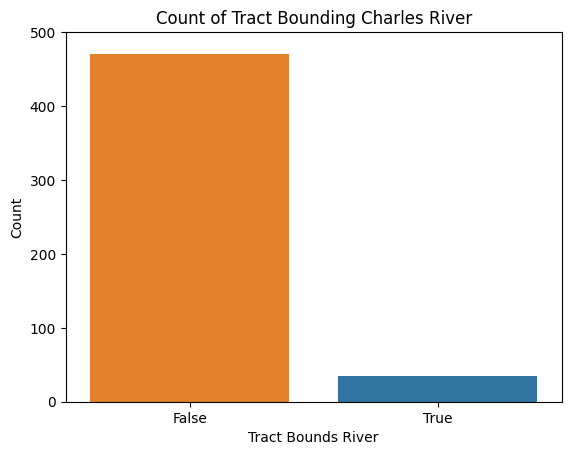

In [10]:
chasdf = boston_df.groupby('CHAS').agg({'CHAS': 'count'})
sns.barplot(data=chasdf, x=[False, True], y='CHAS', hue=[True, False], legend=False)
plt.ylim(0, 500)
plt.xlabel('Tract Bounds River')
plt.ylabel('Count')
plt.title('Count of Tract Bounding Charles River')

By looking at the above bar plot, we can make the following points:

- A significant portion of the regions don't have access to the Charles River
- There are more than 450 tracts not bounding the river while only less than 50 of them bounding the river.

For the next plot, let us start by grouping the `AGE` variable into three categories.

In [11]:
bins = [0, 35, 69.9, boston_df['AGE'].max()]
labels = ['AGE <= 35', '35 < AGE < 70', 'AGE >= 70']

boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
boston_df[['AGE', 'AGE_GROUP']].head(15)

,AGE,AGE_GROUP
0,65.2,35 < AGE < 70
1,78.9,AGE >= 70
2,61.1,35 < AGE < 70
3,45.8,35 < AGE < 70
4,54.2,35 < AGE < 70
5,58.7,35 < AGE < 70
6,66.6,35 < AGE < 70
7,96.1,AGE >= 70
8,100.0,AGE >= 70
9,85.9,AGE >= 70


Text(0.5, 1.0, 'Median value of owner-occupied homes VS Age Group')

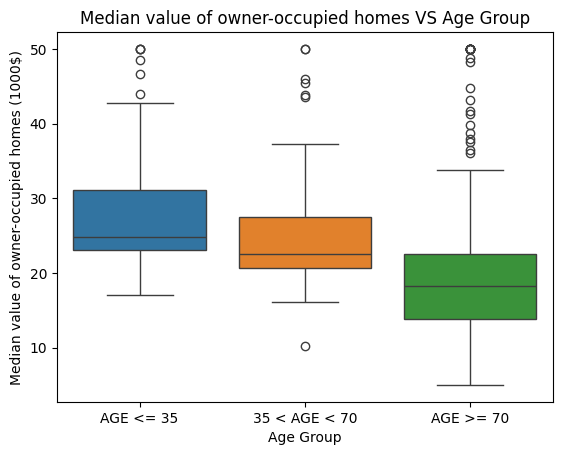

In [12]:
sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV', hue='AGE_GROUP')
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes (1000$)')
plt.title('Median value of owner-occupied homes VS Age Group')

Let us refer to the age groups as follows:

1. AGE <= 35: young
2. 35 < AGE < 70: middle-aged
3. AGE >= 70: old

By looking at the above box plot, we can make the following points:

- The median value of owner-occupied homes decreases as the age group gets older.
- Younger houses are more expensive by comparing the median values as the median value of youngs greater than middle-aged which is greater than old.
- Both maximum and minimum values decrease as the age group gets older, meaning the median value of the owner-occupied homes have lower minimum and maximum values for older age groups.
- Old age group has significantly more outliers.
- Old age group has the widest inter quartile range while middle-aged has the tightest.
- The above applies for the whole range of values, meaning old age group has the widest range of values and the middle-aged has the tightest in terms of median value of the owner-occupied homes.
- The minimum value of the owner-occupied homes for the young and middle-aged group is about as much as the median value for the old group.

Text(0.5, 1.0, 'Proportion of Non-Retail Businesses vs Nitric Oxide Concentration')

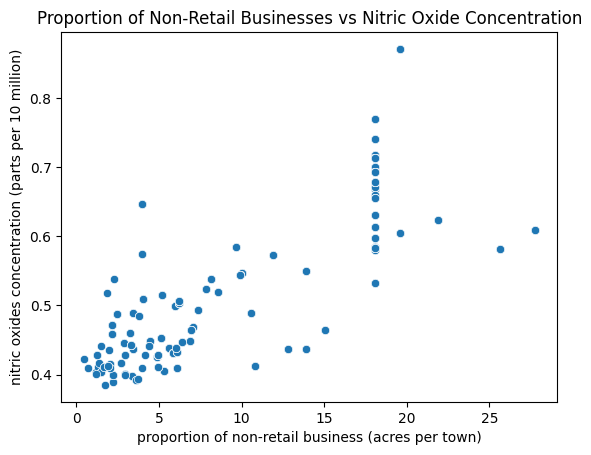

In [13]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
plt.xlabel('proportion of non-retail business (acres per town)')
plt.ylabel('nitric oxides concentration (parts per 10 million)')
plt.title('Proportion of Non-Retail Businesses vs Nitric Oxide Concentration')

By looking at the above scatter plot, we can make the following points:

- There is a positive relation between the `INDUS` and `NOX` columns; meaning they are probably positively correlated.
- Therefore, we can claim that nitric oxides concentration increases with the proportion of land occupied by the non-retail business.

Text(0.5, 1.0, 'Distribution of Pupil-Teacher Ratio by Town')

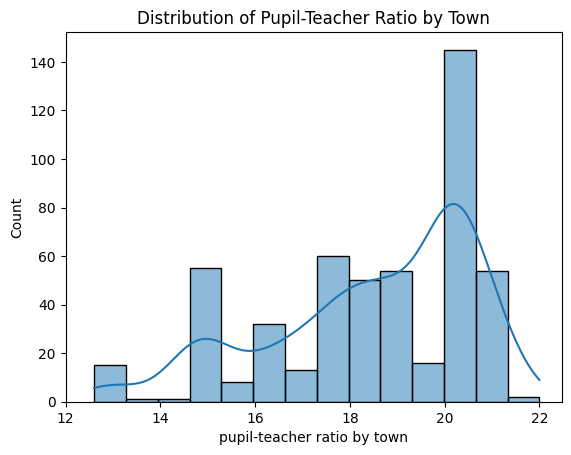

In [14]:
sns.histplot(data=boston_df, x='PTRATIO', kde=True)
plt.xlabel('pupil-teacher ratio by town')
plt.xlim(12,)
plt.title('Distribution of Pupil-Teacher Ratio by Town')

By looking at the above boxplot, we can make the following points:

- The mean value for pupil-teacher ratio by town should be between 18 and 20, closer to 18, and its frequency is about 55.
- By looking at the histogram and the KDE (Kernel Density Estimation) curve, we can conclude that the data is not normally distributed.
- The data is skewed to the right of the mean, meaning the frequency of the pupil-teacher ratio increases with the ratio itself.
- The most common data point is 20, meaning the most frequent ratio of pupil-teach is 20.
- Some pupil-teacher ratios are significantly less frequent than others, such as around 14 and 22.

## Task 3: Use the appropriate tests to answer the questions provided

For these tasks, we'll take $\alpha=0.05$ and conclude our hypothesis according to this $\alpha$ value.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Let us start by stating our hypothesis.

Null hypothesis: There is no difference between the median value of houses bounded by the Charles River and those that are not bounded by the Charles River.

Alternative hypothesis: There is a significant difference between the median value of houses bounded by the Charles River and those that are not bounded by the Charles River.

In [15]:
scipy.stats.ttest_ind(
    boston_df[boston_df.CHAS == 0]['MEDV'],
    boston_df[boston_df.CHAS == 1]['MEDV']
)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

We see that the p-value of our t-test is $7.39\times10^{-5}$, which is less than our $\alpha$ value of $0.05$. Therefore, we reject the null hypothesis as there is significant evidence that there is a statistical difference in median values of houses according to their connection to Charles River.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Let us start by stating our hypothesis.

Null hypothesis: There is no significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Alternative hypothesis: There is a significant difference in median value of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [16]:
scipy.stats.f_oneway(
    boston_df[boston_df.AGE <= 35]['MEDV'],
    boston_df[(boston_df.AGE > 35) & (boston_df.AGE <= 69.9)]['MEDV'],
    boston_df[boston_df.AGE >= 70]['MEDV']
)

F_onewayResult(statistic=np.float64(36.40764999196599), pvalue=np.float64(1.7105011022702984e-15))

We see that the p-value of our ANOVA is $1.71\times10^{-15}$, which is less than our $\alpha$ value of $0.05$. Therefore, we reject the null hypothesis as there is significant evidence that there is a statistical difference between median value of houses and the three age groups of proportion of units built prior to 1940.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Let us start by stating our hypothesis.

Null hypothesis: There is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

Alternative hypothesis: There is a relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

We see that the p-value of our Pearson correlation test is $7.91\times10^{-98}$ which is significantly less than our $\alpha$ value of $0.05$. Therefore, we reject the null hypothesis as there is significant evidence that there is a correlation between nitric oxide concentrations and the proportion of non-retail business.

### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Let us start by stating our hypothesis.

Null hypothesis: There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Alternative hypothesis: There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [18]:
# independent variable x
x = boston_df['DIS']

# dependent variable y
y = boston_df['MEDV']

# add intercept
x = sm.add_constant(x)

# fit the OLS model
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        19:08:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the p-value of our Pearson correlation test is $1.21\times10^{-8}$ which is significantly less than our $\alpha$ value of $0.05$. Therefore, we reject the null hypothesis as there is significant evidence that there is a relation between the weighted distance to the five Boston employment centres and the median value of owner-occupied houses.